### 이진 분류  
머신러닝에서 여러 개의 종류(혹은 <font color=purple>클래스</font>(class))중 하나를 구별해 내는 문제를 <font color=purple>분류</font>(classification)라고 한다. 특히 이 장에서처럼 2개의 클래스 중 하나를 고르는 문제를 <font color=purple>이진 분류</font>(binary classification)라고 한다.

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

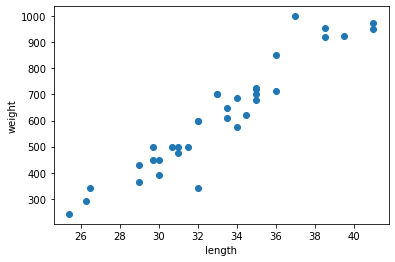

In [3]:
import matplotlib.pyplot as plt #matplotlib의 pyplot 함수를 plt로 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()


### matplotlib
scatter()는 산점도를 그리는 맷플롯립 함수. 처음 2개의 매개변수로 x축 값과 y축 값을 전달함. 이 값은 파이썬 리스트 또는 넘파이 배열이다.  
- c 매개변수로 색깔을 지정할 수 있다. 색깔코드 'b', 'g', 'r', 'c', 'm', 'y' 등 다양하다. 기본 색깔은 https://bit.ly/matplotlib_prop_cycle 을 참고하자. 
- marker 매개변수로 마커 스타일을 지정할 수 있다. marker의 기본값은 o(circle, 원)이다. 지정 가능한 마커의 종류는 https://bit.ly/matplotlib_marker 를 참고하자.

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

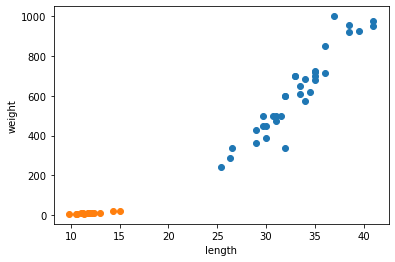

In [5]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

### 첫 번째 머신러닝 프로그램  
가장 간단하고 이해하기 쉬운 <font color=purple>k-최근접 이웃</font>(k-Nearest Neighbors)알고리즘을 사용해 도미와 방어 데이터를 구분해 보자.  
  
k-최근접 이웃 알고리즘을 사용하기 전에 앞에서 준비했던 도미와 빙어 데이터를 하나의 데이터로 합친다.

In [6]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

이 책에서 사용하는 머신러닝 패키지는 <font color=purple>사이킷런</font>(scikit-learn)이다. 이 패키지를 사용하려면 다음과 같이 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트를 만들어야 한다.  
  
그렇게 만드는 가장 쉬운 방법은 파이썬의 zip() 함수와 리스트 내포(list comprehension) 구문을 사용하는 것이다.  
  
zip() 함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환한다. zip() 함수와 리스트 내포 구문을 사용해 length와 weight 리스트를 2차원 리스트로 만들어 보자.

In [7]:
fish_data = [[l,w] for l, w in zip(length, weight)] # zip() 함수는 나열된 리스트에서 원소를 하나씩 꺼내주는 일을 한다.

In [8]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
from sklearn.neighbors import KNeighborsClassifier

K-최근접 알고리즘 사용을 위한 임포트  
K-최근접 알고리즘 : 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 결정

KNeighborsClassifier()는 k-최근접 이웃 분류 모델을 만드는 사이킷런 클래스이다.  
n_neighbors 매개변수로 이웃의 개수를 지정 가능. 기본값은 5이다.  
p 매개변수로 거리를 재는 방법을 지정할 수 있다. 1일 경우 맨해튼거리를 사용, 2일 경우는 유클리디안 거리를 사용. 기본값은 2이다.

In [11]:
kn = KNeighborsClassifier()

In [12]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

fit()은 사이킷런 모델을 훈련할 때 사용하는 메서드이다. 처음 두 매개변수로 훈련에 사용할 특성과 정답 데이터를 전달.

In [13]:
kn.score(fish_data, fish_target)

1.0

score()는 훈련된 사이킷런 모델의 성능을 측정. 처음 두 매개변수로 특성과 정답 데이터를 전달한다. 먼저 predict() 메서드로 예측을 수행한 다음 분류 모델인 경우 정답과 비교하여 올바르게 예측한 개수의 비율을 반환한다.

In [14]:
kn.predict([[30,600]])

array([1])

predict()는 사이킷런 모델을 훈련하고 예측할 때 사용하는 메서드. 특성 데이터 하나만 매개변수로 받는다.

In [15]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [16]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [18]:
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [19]:
kn49.score(fish_data, fish_target)

0.7142857142857143

In [20]:
print(35/49)

0.7142857142857143


kn49 모델은 전체 데이터를 가지고 판단하기 때문에 도미만 올바르게 맞힘.  
그래서 35/49 값인 0.714...... 와 동일한 스코어를 나타냄

#### 결괏값은 왜 한 번만 출력될까?  
kn49.score() 다음에 바로 print 명령을 사용하면 결괏값이 2번 출력되어야 할 것 같지만 그렇지 않다. 코드셀은 마지막 실행 코드의 반환값만을 자동 출력하기 때문이다. 모든 코드를 한 셀에 넣으면 중간의 반환값은 출력하지 않는다.  
  
따라서 두 값을 모두 출력하려면 각각 print 명령을 사용하거나 여러 개의 코드 셀로 나누어 작성해야 한다.

### scikit-learn  
- **KNeighborsClassifier()**는 k-최근접 이웃 분류 모델을 만드는 사이킷런 클래스이다. n_neighbors 매개변수로 이웃의 개수를 지정한다. 기본값은 5이다.
  
    <font color=blue>p 매개변수</font>로 거리를 재는 방법을 지정한다. 1일 경우 맨해튼 거리를 사용하고, 2일 경우 유클리디안 거리를 사용한다. 기본값은 2이다.  
  
    <font color=blue>n_jobs 매개변수</font>로 사용할 CPU 코어를 지정할 수 있다. -1로 설정하면 모든 CPU 코어를 사용한다. 이웃 간의 거리 계산 속도를 높일 수 있지만 fit() 메서드에는 영향이 없다. 기본값은 10이다.
  
- **fit()**은 사이킷런 모델을 훈련할 때 사용하는 메서드이다. 처음 두 매개변수로 훈련에 사용할 특성과 정답 데이터를 전달한다.  
  
- **predict()**는 사이킷런 모델을 훈련하고 예측할 때 사용하는 메서드이다. 특성 데이터 하나만 매개변수로 받는다.  
  
- **score()**는 훈련된 사이킷런 모델의 성능을 측정한다. 처음 두 매개변수로 특성과 정답 데이터를 전달한다. 이 메서드는 먼저 predict() 메서드로 예측을 수행한 다음 분류 모델일 경우 정답과 비교하여 올바르게 예측한 개수의 비율을 반환한다.

In [21]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5,50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    #100% 정확도에 미치치 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939


정확도 점수가 100% 이하로 내려가기 시작하는 이웃의 개수 구하기

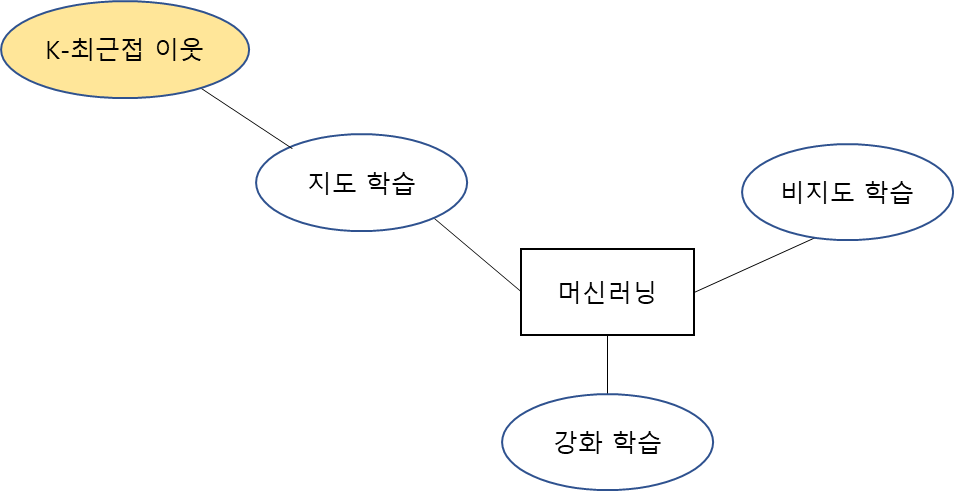